## Import Required Libraries

In [161]:
## load all libraries
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import mean_squared_error
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand

## Load Dataset

In [162]:
df1= pd.read_csv("Test.csv")
df1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E


In [163]:
df= pd.read_csv("Train.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [164]:
print('Train data contains', df.shape[0], 'rows and', df.shape[1], 'columns')
print('Test data contains', df1.shape[0], 'rows and', df1.shape[1], 'columns')

Train data contains 14576 rows and 15 columns
Test data contains 2143 rows and 14 columns


## Merging both the datasets for EDA

In [165]:
data = pd.concat([df1.assign(ind="test"), df.assign(ind="train")])

In [166]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,ind,Global_Sales
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E,test,NaN
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,test,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E,test,NaN
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+,test,NaN
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E,test,NaN


In [167]:
data.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,ind,Global_Sales
14571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,train,0.01
14572,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,train,0.01
14573,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,train,0.01
14574,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,train,0.01
14575,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,train,0.01


## Basic Dataset information

In [168]:
data.shape

(16719, 16)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16719 entries, 0 to 14575
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   Critic_Count     8137 non-null   float64
 10  User_Score       10015 non-null  object 
 11  User_Count       7590 non-null   float64
 12  Developer        10096 non-null  object 
 13  Rating           9950 non-null   object 
 14  ind              16719 non-null  object 
 15  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(8)
memory usage: 2.2+ MB


In [170]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
ind                   0
Global_Sales       2143
dtype: int64

In [171]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales
count,16450.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,14576.000000
mean,2006.487356,0.263330,0.145025,0.077602,68.967679,26.360821,162.229908,0.598972
std,5.878995,0.813514,0.503283,0.308818,13.938165,18.980495,561.282326,1.647699
min,1980.000000,0.000000,0.000000,0.000000,13.000000,3.000000,4.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,60.000000,12.000000,10.000000,0.050000
50%,2007.000000,0.080000,0.020000,0.000000,71.000000,21.000000,24.000000,0.220000
75%,2010.000000,0.240000,0.110000,0.040000,79.000000,36.000000,81.000000,0.550000
max,2020.000000,41.360000,28.960000,10.220000,98.000000,113.000000,10665.000000,82.530000


In [172]:
data.describe(include=object)

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating,ind
count,16717,16719,16717,16665,10015,10096,9950,16719
unique,11562,31,12,580,96,1696,8,2
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E,train
freq,12,2161,3370,1356,2425,204,3991,14576


## Null Value Treatment

In [173]:
data.loc[data["Name"].isnull()==True]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,ind,Global_Sales
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,NaN,NaN,NaN,NaN,NaN,NaN,train,2.39
12103,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN,train,0.03


In [174]:
data.loc[data["Genre"].isnull()==True]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,ind,Global_Sales
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,NaN,NaN,NaN,NaN,NaN,NaN,train,2.39
12103,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN,train,0.03


In [175]:
# drooping same rows with missing values in both Genre and Name 
data.drop([df.index[659], df.index[12103]], inplace=True)

In [176]:
data.isnull().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       8579
Critic_Count       8579
User_Score         6701
User_Count         9126
Developer          6620
Rating             6766
ind                   0
Global_Sales       2142
dtype: int64

In [177]:
data["User_Score"].unique()

array(['7.6', nan, 'tbd', '7.1', '2.2', '3.7', '7', '8.8', '7.8', '7.4',
       '6.3', '8.7', '6.7', '6.2', '5.9', '3.8', '9', '3.2', '6', '4.2',
       '8.2', '7.2', '8.3', '9.1', '5.6', '8.5', '6.6', '7.3', '7.5',
       '6.8', '2.5', '9.2', '3.1', '5.5', '8.1', '8', '5.7', '6.4', '6.9',
       '3.5', '3.9', '1.8', '6.5', '9.4', '5', '7.7', '2.4', '8.4', '3',
       '2', '4.8', '4.7', '5.2', '1.3', '4.9', '5.8', '4.5', '7.9', '4.3',
       '4', '5.4', '8.6', '2.1', '3.4', '0.2', '8.9', '1.4', '5.1', '6.1',
       '9.3', '1.7', '5.3', '3.3', '4.1', '2.8', '4.6', '2.7', '4.4',
       '1.5', '0.9', '2.6', '2.9', '1.9', '9.5', '3.6', '0', '1.6', '9.6',
       '1.1', '0.3', '0.7', '1.2', '2.3', '0.5', '0.6', '1', '9.7'],
      dtype=object)

In [178]:
# changing the data type of User_Score
data['User_Score'].replace('tbd', np.NaN, inplace=True)

In [179]:
data["User_Score"].unique()

array(['7.6', nan, '7.1', '2.2', '3.7', '7', '8.8', '7.8', '7.4', '6.3',
       '8.7', '6.7', '6.2', '5.9', '3.8', '9', '3.2', '6', '4.2', '8.2',
       '7.2', '8.3', '9.1', '5.6', '8.5', '6.6', '7.3', '7.5', '6.8',
       '2.5', '9.2', '3.1', '5.5', '8.1', '8', '5.7', '6.4', '6.9', '3.5',
       '3.9', '1.8', '6.5', '9.4', '5', '7.7', '2.4', '8.4', '3', '2',
       '4.8', '4.7', '5.2', '1.3', '4.9', '5.8', '4.5', '7.9', '4.3', '4',
       '5.4', '8.6', '2.1', '3.4', '0.2', '8.9', '1.4', '5.1', '6.1',
       '9.3', '1.7', '5.3', '3.3', '4.1', '2.8', '4.6', '2.7', '4.4',
       '1.5', '0.9', '2.6', '2.9', '1.9', '9.5', '3.6', '0', '1.6', '9.6',
       '1.1', '0.3', '0.7', '1.2', '2.3', '0.5', '0.6', '1', '9.7'],
      dtype=object)

In [180]:
data["User_Score"]=data["User_Score"].astype("float")

In [181]:
data["Rating"].unique()

array(['E', nan, 'E10+', 'T', 'M', 'EC', 'K-A', 'AO', 'RP'], dtype=object)

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16716 entries, 0 to 14575
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16716 non-null  object 
 1   Platform         16716 non-null  object 
 2   Year_of_Release  16447 non-null  float64
 3   Genre            16716 non-null  object 
 4   Publisher        16662 non-null  object 
 5   NA_Sales         16716 non-null  float64
 6   EU_Sales         16716 non-null  float64
 7   JP_Sales         16716 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   Critic_Count     8137 non-null   float64
 10  User_Score       7590 non-null   float64
 11  User_Count       7590 non-null   float64
 12  Developer        10096 non-null  object 
 13  Rating           9950 non-null   object 
 14  ind              16716 non-null  object 
 15  Global_Sales     14574 non-null  float64
dtypes: float64(9), object(7)
memory usage: 2.2+ MB


In [183]:
data["Year_of_Release"].unique()

array([2011., 2005., 2009., 2008., 2010., 1995., 2016., 2004., 1997.,
       2007., 2015., 2000., 2013., 2003., 2001.,   nan, 1998., 2014.,
       2002., 2006., 2012., 1992., 1993., 1999., 1981., 1996., 1994.,
       1991., 1987., 1985., 1989., 1984., 1990., 1988., 1982., 1986.,
       1980., 1983., 2020., 2017.])

In [184]:
# filling missing values using mode in categorical data
data['Name'].fillna(value="mode" ,inplace=True),
data['Genre'].fillna(value="mode",inplace=True),
data['Publisher'].fillna(value="mode",inplace=True),
data['Developer'].fillna(value="mode" ,inplace=True),
data['Rating'].fillna(value="mode" ,inplace=True),
data['Name'].fillna(value="mode" ,inplace=True),
data['Genre'].fillna(value="mode",inplace=True),
data['Publisher'].fillna(value="mode",inplace=True),
data['Developer'].fillna(value="mode" ,inplace=True),
data['Rating'].fillna(value="mode" ,inplace=True)

In [185]:
df3=data.drop(columns=['Name','Platform','Genre','Publisher','Developer','Rating','ind','Global_Sales','NA_Sales','EU_Sales','JP_Sales', "ind"], axis=1)

In [186]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [187]:
num_impute= IterativeImputer()

In [188]:
f=num_impute.fit_transform(df3)

In [189]:
d=pd.DataFrame(f,columns=df3.columns)

In [190]:
# changing data type 
d['Year_of_Release'] = d['Year_of_Release'].apply(int)

In [191]:
d

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count
0,2011,72.683865,30.403225,7.600000,7.000000
1,2005,68.714360,23.961607,7.282452,72.055183
2,2009,68.702989,27.917784,6.930005,172.047970
3,2008,49.000000,22.000000,7.100000,7.000000
4,2009,68.702989,27.917784,6.930005,172.047970
...,...,...,...,...,...
16711,2016,68.683090,34.841094,6.313223,347.035348
16712,2006,68.711518,24.950651,7.194340,97.053380
16713,2016,68.683090,34.841094,6.313223,347.035348
16714,2003,68.720046,21.983518,7.458675,22.058789


In [192]:
d.isnull().sum()

Year_of_Release    0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
dtype: int64

In [193]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating', 'ind', 'Global_Sales'],
      dtype='object')

In [194]:
data3=data[['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales','Developer', 'Rating', 'ind', 'Global_Sales']]

In [195]:
data3

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Developer,Rating,ind,Global_Sales
0,Nicktoons: MLB,X360,Sports,Take-Two Interactive,0.12,0.00,0.00,High Voltage Software,E,test,NaN
1,Shonen Jump's One Piece: Grand Battle,PS2,Fighting,Atari,0.07,0.05,0.00,mode,mode,test,NaN
2,Learn Math,DS,Puzzle,DreamCatcher Interactive,0.12,0.00,0.00,Dreamcatcher,E,test,NaN
3,Nitrobike,Wii,Racing,Ubisoft,0.11,0.01,0.00,Left Field Productions,E10+,test,NaN
4,Cruise Ship Vacation Games,Wii,Puzzle,Avanquest,0.12,0.00,0.00,Activision,E,test,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14571,Samurai Warriors: Sanada Maru,PS3,Action,Tecmo Koei,0.00,0.00,0.01,mode,mode,train,0.01
14572,LMA Manager 2007,X360,Sports,Codemasters,0.00,0.01,0.00,mode,mode,train,0.01
14573,Haitaka no Psychedelica,PSV,Adventure,Idea Factory,0.00,0.00,0.01,mode,mode,train,0.01
14574,Spirits & Spells,GBA,Platform,Wanadoo,0.01,0.00,0.00,mode,mode,train,0.01


In [196]:
data3.isnull().sum()

Name               0
Platform           0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Developer          0
Rating             0
ind                0
Global_Sales    2142
dtype: int64

In [197]:
data5 = pd.concat([data3.reset_index(drop=True),d.reset_index(drop=True)], axis=1)

In [198]:
data5

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Developer,Rating,ind,Global_Sales,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count
0,Nicktoons: MLB,X360,Sports,Take-Two Interactive,0.12,0.00,0.00,High Voltage Software,E,test,NaN,2011,72.683865,30.403225,7.600000,7.000000
1,Shonen Jump's One Piece: Grand Battle,PS2,Fighting,Atari,0.07,0.05,0.00,mode,mode,test,NaN,2005,68.714360,23.961607,7.282452,72.055183
2,Learn Math,DS,Puzzle,DreamCatcher Interactive,0.12,0.00,0.00,Dreamcatcher,E,test,NaN,2009,68.702989,27.917784,6.930005,172.047970
3,Nitrobike,Wii,Racing,Ubisoft,0.11,0.01,0.00,Left Field Productions,E10+,test,NaN,2008,49.000000,22.000000,7.100000,7.000000
4,Cruise Ship Vacation Games,Wii,Puzzle,Avanquest,0.12,0.00,0.00,Activision,E,test,NaN,2009,68.702989,27.917784,6.930005,172.047970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16711,Samurai Warriors: Sanada Maru,PS3,Action,Tecmo Koei,0.00,0.00,0.01,mode,mode,train,0.01,2016,68.683090,34.841094,6.313223,347.035348
16712,LMA Manager 2007,X360,Sports,Codemasters,0.00,0.01,0.00,mode,mode,train,0.01,2006,68.711518,24.950651,7.194340,97.053380
16713,Haitaka no Psychedelica,PSV,Adventure,Idea Factory,0.00,0.00,0.01,mode,mode,train,0.01,2016,68.683090,34.841094,6.313223,347.035348
16714,Spirits & Spells,GBA,Platform,Wanadoo,0.01,0.00,0.00,mode,mode,train,0.01,2003,68.720046,21.983518,7.458675,22.058789


In [199]:
# all the null values are now treated
data5.isnull().sum()

Name                  0
Platform              0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Developer             0
Rating                0
ind                   0
Global_Sales       2142
Year_of_Release       0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
dtype: int64

## Train-Test Split

In [200]:
# splitting the data back into train and test
test, train = data5[data5["ind"].eq("test")], data5[data5["ind"].eq("train")]

In [201]:
train.drop("ind",axis=1,inplace=True)

In [202]:
train.shape

(14574, 15)

In [203]:
train.columns

Index(['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Developer', 'Rating', 'Global_Sales', 'Year_of_Release',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'],
      dtype='object')

In [204]:
test.drop(columns=["ind", "Global_Sales"],inplace=True,index=1)

In [205]:
test.columns

Index(['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Developer', 'Rating', 'Year_of_Release', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count'],
      dtype='object')

In [206]:
test.shape

(2141, 14)

## Outlier Treatment in Train Dataset

In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14574 entries, 2142 to 16715
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14574 non-null  object 
 2   Genre            14574 non-null  object 
 3   Publisher        14574 non-null  object 
 4   NA_Sales         14574 non-null  float64
 5   EU_Sales         14574 non-null  float64
 6   JP_Sales         14574 non-null  float64
 7   Developer        14574 non-null  object 
 8   Rating           14574 non-null  object 
 9   Global_Sales     14574 non-null  float64
 10  Year_of_Release  14574 non-null  int64  
 11  Critic_Score     14574 non-null  float64
 12  Critic_Count     14574 non-null  float64
 13  User_Score       14574 non-null  float64
 14  User_Count       14574 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 1.8+ MB


In [208]:
train.describe(percentiles=[0.01, 0.02,0.03, 0.04, 0.05, 0.1, .25, .5, .75, .9, .95, .96, .97, .98, .99])

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count
count,14574.000000,14574.000000,14574.000000,14574.000000,14574.000000,14574.000000,14574.000000,14574.000000,14574.000000
mean,0.295495,0.163943,0.085668,0.598888,2006.430081,69.073713,25.850437,7.172091,113.479820
std,0.866459,0.536380,0.329667,1.647738,5.919543,9.977286,14.676185,1.127996,418.924216
min,0.000000,0.000000,0.000000,0.010000,1980.000000,13.000000,-0.764501,0.000000,-552.899738
1%,0.000000,0.000000,0.000000,0.010000,1986.000000,36.000000,4.000000,3.100000,-402.910557
2%,0.000000,0.000000,0.000000,0.010000,1992.000000,42.000000,4.000000,4.000000,-256.839761
3%,0.000000,0.000000,0.000000,0.010000,1994.000000,45.000000,5.000000,4.500000,-212.640577
4%,0.000000,0.000000,0.000000,0.010000,1995.000000,48.000000,5.000000,4.900000,-191.202376
5%,0.000000,0.000000,0.000000,0.020000,1996.000000,50.000000,6.000000,5.197591,-177.926785
10%,0.000000,0.000000,0.000000,0.020000,1999.000000,58.000000,9.000000,6.000000,-110.085021


In [209]:
train.columns

Index(['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Developer', 'Rating', 'Global_Sales', 'Year_of_Release',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x205180eb970>,
 'caps': [<matplotlib.lines.Line2D at 0x205180ebeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x205180eb6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x20518120430>],
 'fliers': [<matplotlib.lines.Line2D at 0x205181206d0>],
 'means': []}

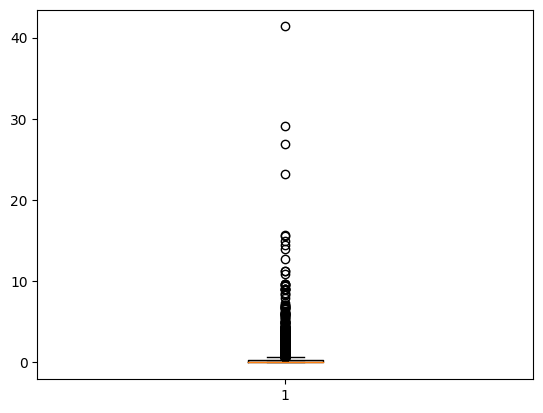

In [210]:
plt.boxplot(train["NA_Sales"])

In [211]:
train["NA_Sales"]=np.where(train["NA_Sales"]>17.5,17.5,train["NA_Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20510c4cb20>,
 'caps': [<matplotlib.lines.Line2D at 0x20510c4d060>,
 'boxes': [<matplotlib.lines.Line2D at 0x20510c4c880>],
 'medians': [<matplotlib.lines.Line2D at 0x20510c4d5a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20510c4d840>],
 'means': []}

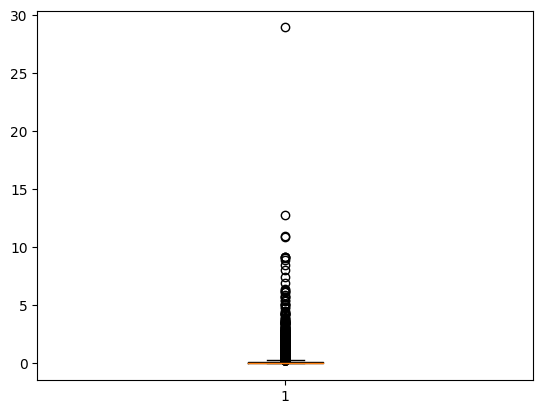

In [212]:
plt.boxplot(df["EU_Sales"])

In [213]:
train["EU_Sales"]=np.where(train["EU_Sales"]>12,12,train["EU_Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20510c805e0>,
 'caps': [<matplotlib.lines.Line2D at 0x20510c809d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20510c80340>],
 'medians': [<matplotlib.lines.Line2D at 0x20510c80f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x20510c811e0>],
 'means': []}

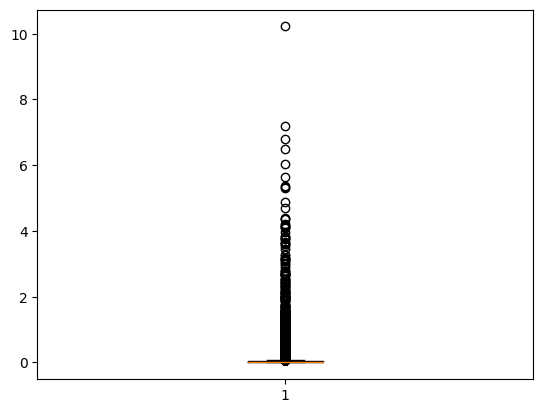

In [214]:
plt.boxplot(train["JP_Sales"])

In [215]:
train["JP_Sales"]=np.where(train["JP_Sales"]>7,7,train["JP_Sales"])

In [216]:
train.describe(percentiles=[0.01, 0.02,0.03, 0.04, 0.05, 0.1, .25, .5, .75, .9, .95, .96, .97, .98, .99])

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count
count,14574.000000,14574.000000,14574.000000,14574.000000,14574.000000,14574.000000,14574.000000,14574.000000,14574.000000
mean,0.292026,0.162727,0.085434,0.598888,2006.430081,69.073713,25.850437,7.172091,113.479820
std,0.758115,0.489020,0.323606,1.647738,5.919543,9.977286,14.676185,1.127996,418.924216
min,0.000000,0.000000,0.000000,0.010000,1980.000000,13.000000,-0.764501,0.000000,-552.899738
1%,0.000000,0.000000,0.000000,0.010000,1986.000000,36.000000,4.000000,3.100000,-402.910557
2%,0.000000,0.000000,0.000000,0.010000,1992.000000,42.000000,4.000000,4.000000,-256.839761
3%,0.000000,0.000000,0.000000,0.010000,1994.000000,45.000000,5.000000,4.500000,-212.640577
4%,0.000000,0.000000,0.000000,0.010000,1995.000000,48.000000,5.000000,4.900000,-191.202376
5%,0.000000,0.000000,0.000000,0.020000,1996.000000,50.000000,6.000000,5.197591,-177.926785
10%,0.000000,0.000000,0.000000,0.020000,1999.000000,58.000000,9.000000,6.000000,-110.085021


## Outlier Treatment in Test Dataset

In [217]:
test.describe(percentiles=[0.01, 0.02,0.03, 0.04, 0.05, 0.1, .25, .5, .75, .9, .95, .96, .97, .98, .99])

,NA_Sales,EU_Sales,JP_Sales,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count
count,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000
mean,0.044007,0.016245,0.022774,2006.823914,66.235307,22.597676,7.009782,80.570677
std,0.036211,0.020976,0.038493,5.286494,9.832069,9.835216,1.116172,272.035774
min,0.000000,0.000000,0.000000,1981.000000,19.000000,0.224543,0.200000,-527.901541
1%,0.000000,0.000000,0.000000,1994.000000,32.000000,4.000000,2.500000,-243.115626
2%,0.000000,0.000000,0.000000,1995.000000,36.000000,4.000000,3.480000,-202.924982
3%,0.000000,0.000000,0.000000,1995.000000,39.000000,5.000000,4.200000,-177.926785
4%,0.000000,0.000000,0.000000,1996.000000,42.714437,5.000000,4.700000,-177.926785
5%,0.000000,0.000000,0.000000,1997.000000,45.000000,6.000000,5.000000,-159.850677
10%,0.000000,0.000000,0.000000,2000.000000,53.000000,9.000000,6.000000,-102.932195


#### There are no outliers in test dataset

## LABEL ENCODING IN TRAIN DATASET

In [218]:
from sklearn.preprocessing import LabelEncoder

In [219]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14574 entries, 2142 to 16715
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14574 non-null  object 
 2   Genre            14574 non-null  object 
 3   Publisher        14574 non-null  object 
 4   NA_Sales         14574 non-null  float64
 5   EU_Sales         14574 non-null  float64
 6   JP_Sales         14574 non-null  float64
 7   Developer        14574 non-null  object 
 8   Rating           14574 non-null  object 
 9   Global_Sales     14574 non-null  float64
 10  Year_of_Release  14574 non-null  int64  
 11  Critic_Score     14574 non-null  float64
 12  Critic_Count     14574 non-null  float64
 13  User_Score       14574 non-null  float64
 14  User_Count       14574 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 1.8+ MB


In [220]:
train["Name_label_encoded"]=LabelEncoder().fit_transform(train.Name)

In [221]:
train["Platform_label_encoded"]=LabelEncoder().fit_transform(train.Platform)

In [222]:
train["Genre_label_encoded"]=LabelEncoder().fit_transform(train.Genre)
train["Publisher_label_encoded"]=LabelEncoder().fit_transform(train.Publisher)
train["Developer_label_encoded"]=LabelEncoder().fit_transform(train.Developer)
train["Rating_label_encoded"]=LabelEncoder().fit_transform(train.Rating)

In [223]:
train1=train.drop(columns=["Name", "Platform","Genre", "Publisher", "Developer", "Rating"])

In [224]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14574 entries, 2142 to 16715
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NA_Sales                 14574 non-null  float64
 1   EU_Sales                 14574 non-null  float64
 2   JP_Sales                 14574 non-null  float64
 3   Global_Sales             14574 non-null  float64
 4   Year_of_Release          14574 non-null  int64  
 5   Critic_Score             14574 non-null  float64
 6   Critic_Count             14574 non-null  float64
 7   User_Score               14574 non-null  float64
 8   User_Count               14574 non-null  float64
 9   Name_label_encoded       14574 non-null  int32  
 10  Platform_label_encoded   14574 non-null  int32  
 11  Genre_label_encoded      14574 non-null  int32  
 12  Publisher_label_encoded  14574 non-null  int32  
 13  Developer_label_encoded  14574 non-null  int32  
 14  Rating_label_encode

## LABEL ENCODING IN TEST DATASET

In [225]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2141 non-null   object 
 1   Platform         2141 non-null   object 
 2   Genre            2141 non-null   object 
 3   Publisher        2141 non-null   object 
 4   NA_Sales         2141 non-null   float64
 5   EU_Sales         2141 non-null   float64
 6   JP_Sales         2141 non-null   float64
 7   Developer        2141 non-null   object 
 8   Rating           2141 non-null   object 
 9   Year_of_Release  2141 non-null   int64  
 10  Critic_Score     2141 non-null   float64
 11  Critic_Count     2141 non-null   float64
 12  User_Score       2141 non-null   float64
 13  User_Count       2141 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 250.9+ KB


In [226]:
test["Name_label_encoded"]=LabelEncoder().fit_transform(test.Name)
test["Platform_label_encoded"]=LabelEncoder().fit_transform(test.Platform)
test["Genre_label_encoded"]=LabelEncoder().fit_transform(test.Genre)
test["Publisher_label_encoded"]=LabelEncoder().fit_transform(test.Publisher)
test["Developer_label_encoded"]=LabelEncoder().fit_transform(test.Developer)
test["Rating_label_encoded"]=LabelEncoder().fit_transform(test.Rating)

In [227]:
test1=test.drop(columns=["Name", "Platform","Genre", "Publisher", "Developer", "Rating"])

In [228]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NA_Sales                 2141 non-null   float64
 1   EU_Sales                 2141 non-null   float64
 2   JP_Sales                 2141 non-null   float64
 3   Year_of_Release          2141 non-null   int64  
 4   Critic_Score             2141 non-null   float64
 5   Critic_Count             2141 non-null   float64
 6   User_Score               2141 non-null   float64
 7   User_Count               2141 non-null   float64
 8   Name_label_encoded       2141 non-null   int32  
 9   Platform_label_encoded   2141 non-null   int32  
 10  Genre_label_encoded      2141 non-null   int32  
 11  Publisher_label_encoded  2141 non-null   int32  
 12  Developer_label_encoded  2141 non-null   int32  
 13  Rating_label_encoded     2141 non-null   int32  
dtypes: float64(7), int32(6),

## RUNNING MODEL

#### Using Linear Regression model here because-
1. Linear Regression is simple to implement and easier to interpret the output coefficients.
2. As know the independent and dependent variables, this algorithm is the best to use because it’s less complex as compared to other algorithms.

In [229]:
X=train1.drop(columns=["Global_Sales"])
y=train1["Global_Sales"]

In [230]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=99)

In [231]:
lr=LinearRegression()

In [232]:
lr.fit(X_train, y_train)

LinearRegression()

In [257]:
print('Model Accuracy:')
lr.score(X_train, y_train)

Model Accuracy:


0.9291037688794574

In [258]:
lr.score(X_test, y_test)
print('Coefficients: \n', lr.coef_)
print("Bias: ", lr.intercept_)
print('Model has trained successfully')

Coefficients: 
 [ 1.21246615e+00  1.27239986e+00  1.01782715e+00  7.39257828e-03
 -2.09047055e-03 -1.32004290e-03  1.44209920e-02 -5.14113224e-05
  1.34193493e-06 -4.91536572e-05  2.06664444e-03  1.43997955e-05
 -3.73816418e-07  3.29501776e-03]
Bias:  -14.837569889544385
Model has trained successfully


In [259]:
pred_train=lr.predict(X_train)
pred_test=lr.predict(X_test)

In [260]:
print("RMSE", np.sqrt(np.mean(np.square(y_train-pred_train))))

RMSE 0.4361378901593905


In [261]:
print("RMSE", np.sqrt(np.mean(np.square(y_test-pred_test))))

RMSE 0.23618179611000173


## PREDICTING FROM TEST DATA

In [262]:
train_X=test1

In [263]:
predicted_global_sales=lr.predict(train_X)
print(predicted_global_sales)

[0.11590853 0.08247724 0.14305991 ... 0.02489113 0.0987032  0.01527031]


In [264]:
Globalsales=pd.DataFrame({"Name" : test.Name, "Global sales" : predicted_global_sales})
Globalsales.to_csv("Globalsale.csv", index=False)